# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from sklearn import datasets

In [3]:
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls

In [5]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "Ngozi"
unit = "metric"
api_key = "3ae14226d6578ff5467d07ed9b61be99"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&q="
weather_data = []
record_count = 0
set_count = 1
i = 1
#for i,city in enumerate(cities):
for city in cities:
    if (i % 50 == 0 and i >= 50):
        set_count += 1 
        record_count = 0
    i += 1
    print(f"Processing record %s of set %s | %s" % (record_count, set_count, city))
    record_count += 1
    city_url = query_url + city
    # Get the temperature from the response
    try: 
        # Get weather data
        weather_json = requests.get(city_url).json()
        Cloudiness = weather_json["clouds"]["all"]
        Country = weather_json["sys"]["country"]
        Date = weather_json["dt"]
        Humidity = weather_json["main"]["humidity"]
        Lat = weather_json["coord"]["lat"]
        Lng = weather_json["coord"]["lon"]
        Max_Temp = weather_json["main"]["temp_max"]
        Wind_Speed = weather_json["wind"]["speed"]
        weather_data.append({
                "City":city, 
                "Cloudiness":Cloudiness, 
                "Country":Country, 
                "Date":Date,
                "Humidity":Humidity,
                "Lat":Lat,
                "Lng":Lng,
                "Max Temp":Max_Temp,
                "Wind Speed":Wind_Speed}) 
    except:
        print("City Not Found")
        pass
    
print("Data retrieval done.")

Processing record 0 of set 1 | butaritari
Processing record 1 of set 1 | bodden town
Processing record 2 of set 1 | port elizabeth
Processing record 3 of set 1 | lagoa
Processing record 4 of set 1 | saryagash
Processing record 5 of set 1 | necochea
Processing record 6 of set 1 | upernavik
Processing record 7 of set 1 | east london
Processing record 8 of set 1 | khorixas
Processing record 9 of set 1 | svetlogorsk
Processing record 10 of set 1 | new norfolk
Processing record 11 of set 1 | busselton
Processing record 12 of set 1 | murud
Processing record 13 of set 1 | camacupa
Processing record 14 of set 1 | moindou
Processing record 15 of set 1 | airai
Processing record 16 of set 1 | atuona
Processing record 17 of set 1 | bengkulu
Processing record 18 of set 1 | kapaa
Processing record 19 of set 1 | bluff
Processing record 20 of set 1 | mataura
Processing record 21 of set 1 | lompoc
Processing record 22 of set 1 | pueblo nuevo
Processing record 23 of set 1 | zharkent
Processing record 24

### Convert Raw Data to DataFrame

In [6]:
city_data_df = pd.DataFrame(weather_data)
city_data_df.to_csv("weather_data.csv", index_label="City ID")

#Convert Temp to F
city_data_df['Max Temp'] = (city_data_df['Max Temp'] - 241.15) * (9/5)
city_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,butaritari,75,KI,1586114686,78,3.07,172.79,108.162,6.06
1,bodden town,20,KY,1586114804,66,19.28,-81.25,113.400,4.10
2,port elizabeth,60,ZA,1586114805,82,-33.92,25.57,90.000,6.70
3,lagoa,100,PT,1586114805,83,39.05,-27.98,82.350,7.39
4,saryagash,90,KZ,1586114805,100,41.45,69.17,79.200,1.00
...,...,...,...,...,...,...,...,...,...
540,cotacachi,40,EC,1586114867,41,0.30,-78.27,102.600,5.70
541,mehamn,90,NO,1586114763,92,71.04,27.85,52.200,8.20
542,horodyshche,0,UA,1586114880,58,49.28,31.45,67.608,4.10
543,dzhebariki-khaya,100,RU,1586114880,95,62.22,135.80,39.762,1.90


### Plotting the Data

#### Latitude vs. Temperature Plot

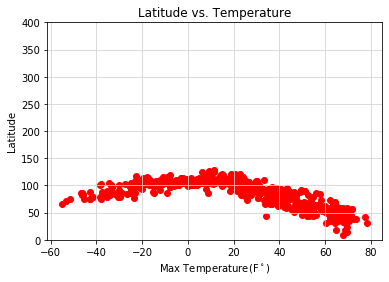

In [7]:
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color="r", marker="o")
plt.title(f"Latitude vs. Temperature")
plt.xlabel(f"Max Temperature(F$^\circ$)")
plt.ylabel("Latitude")
plt.xlim()
plt.ylim(0, 400)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

#The code here is illustrating the relationship between latitude vs. temperature of 557 cities around the world. 

#### Latitude vs. Humidity Plot

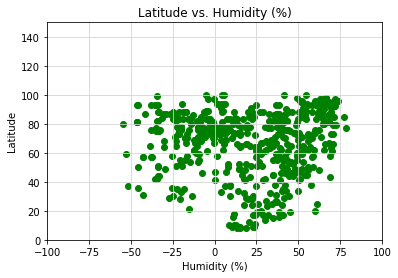

In [8]:
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color="g", marker="o")
plt.title(f"Latitude vs. Humidity (%)")
plt.xlabel(f"Humidity (%)")
plt.ylabel("Latitude")
plt.xlim(-100, 100)
plt.ylim(0, 150)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

#Here the code is demonstrating how humidity changes as you go further from the equator. 

#### Latitude vs. Cloudiness Plot

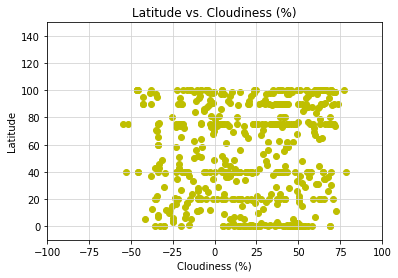

In [9]:
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color="y", marker="o")
plt.title(f"Latitude vs. Cloudiness (%)")
plt.xlabel(f"Cloudiness (%)")
plt.ylabel("Latitude")
plt.xlim(-100, 100)
plt.ylim(-10, 150)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

#This plot compares the cloudiness of different cities at different latitudes around the world. 

#### Latitude vs. Wind Speed Plot

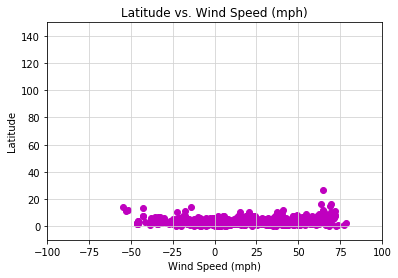

In [10]:
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color="m", marker="o")
plt.title(f"Latitude vs. Wind Speed (mph)")
plt.xlabel(f"Wind Speed (mph)")
plt.ylabel("Latitude")
plt.xlim(-100, 100)
plt.ylim(-10, 150)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()

#This plot indicates how wind speed changes based on latitude. 

# OPTIONAL: Create a function to create Linear Regression plots


In [11]:
# Create Northern and Southern Hemisphere DataFrames
northern = city_data_df.loc[city_data_df.Lat > 0]
southern = city_data_df.loc[city_data_df.Lat < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0, 0.5, 'Latitude')

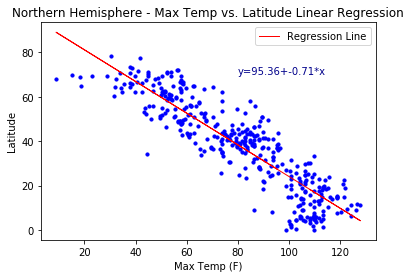

In [12]:
#Best Fit Polynomial
mtemp_n = np.polyfit(northern["Max Temp"], northern["Lat"], 1)

#Scatter Plot
plt.scatter(northern["Max Temp"], northern["Lat"], color='blue', linewidth=1, s=10)

#Regression Lines
plt.plot(northern["Max Temp"], mtemp_n[0]*northern["Max Temp"]+mtemp_n[1], color='red', linewidth=1)

#Regression Equations
plt.text(80,70,'y={:.2f}+{:.2f}*x'.format(mtemp_n[1],mtemp_n[0]),color='darkblue',size=10)

#Legend, title, labels
plt.legend(labels=['Regression Line'])
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Max Temp (F)")
plt.ylabel("Latitude")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0, 0.5, 'Latitude')

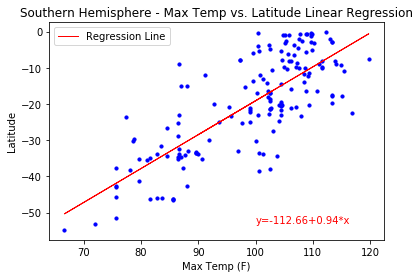

In [13]:
#Best Fit Polynomial
mtemp_s = np.polyfit(southern["Max Temp"], southern["Lat"], 1)

#Scatter Plot
plt.scatter(southern["Max Temp"], southern["Lat"], color='blue', linewidth=1, s=10)

#Regression Lines
plt.plot(southern["Max Temp"], mtemp_s[0]*southern["Max Temp"]+mtemp_s[1], color='red', linewidth=1)

#Regression Equations
plt.text(100,-53,'y={:.2f}+{:.2f}*x'.format(mtemp_s[1],mtemp_s[0]),color='red',size=10)

#Legend, title, labels
plt.legend(labels=['Regression Line'])
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Max Temp (F)")
plt.ylabel("Latitude")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(0, 0.5, 'Latitude')

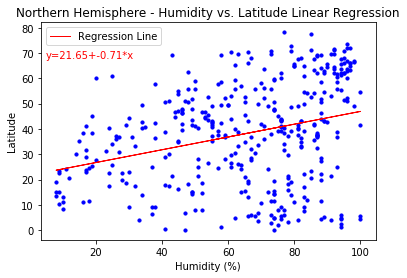

In [14]:
#Best Fit Polynomial
hum_n = np.polyfit(northern["Humidity"], northern["Lat"], 1)

#Scatter Plot
plt.scatter(northern["Humidity"], northern["Lat"], color='blue', linewidth=1, s=10)

#Regression Lines
plt.plot(northern["Humidity"], hum_n[0]*northern["Humidity"]+hum_n[1], color='red', linewidth=1)

#Regression Equations
plt.text(5,68,'y={:.2f}+{:.2f}*x'.format(hum_n[1],mtemp_n[0]),color='red',size=10)

#Legend, title, labels
plt.legend(labels=['Regression Line'])
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(0, 0.5, 'Latitude')

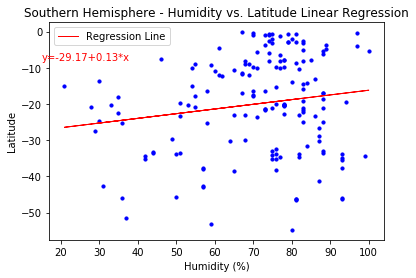

In [15]:
#Best Fit Polynomial
hum_s = np.polyfit(southern["Humidity"], southern["Lat"], 1)

#Scatter Plot
plt.scatter(southern["Humidity"], southern["Lat"], color='blue', linewidth=1, s=10)

#Regression Lines
plt.plot(southern["Humidity"], hum_s[0]*southern["Humidity"]+hum_s[1], color='red', linewidth=1)

#Regression Equations
plt.text(15,-8,'y={:.2f}+{:.2f}*x'.format(hum_s[1],hum_s[0]),color='red',size=10)

#Legend, title, labels
plt.legend(labels=['Regression Line'])
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(0, 0.5, 'Latitude')

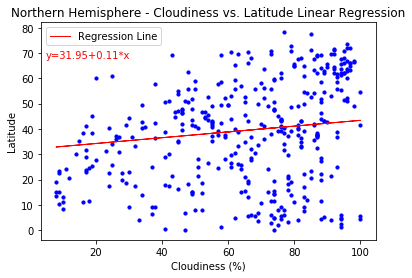

In [16]:
#Best Fit Polynomial
cloud_n = np.polyfit(northern["Cloudiness"], northern["Lat"], 1)

#Scatter Plot
plt.scatter(northern["Humidity"], northern["Lat"], color='blue', linewidth=1, s=10)

#Regression Lines
plt.plot(northern["Humidity"], cloud_n[0]*northern["Humidity"]+cloud_n[1], color='red', linewidth=1)

#Regression Equations
plt.text(5,68,'y={:.2f}+{:.2f}*x'.format(cloud_n[1],cloud_n[0]),color='red',size=10)

#Legend, title, labels
plt.legend(labels=['Regression Line'])
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(0, 0.5, 'Latitude')

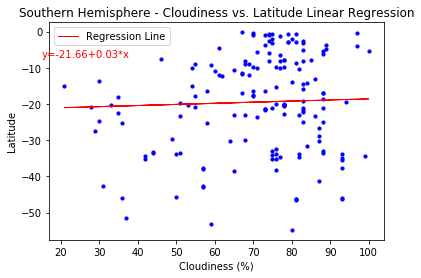

In [17]:
#Best Fit Polynomial
cloud_s = np.polyfit(southern["Cloudiness"], southern["Lat"], 1)

#Scatter Plot
plt.scatter(southern["Humidity"], southern["Lat"], color='blue', linewidth=1, s=10)

#Regression Lines
plt.plot(southern["Humidity"], cloud_s[0]*southern["Humidity"]+cloud_s[1], color='red', linewidth=1)

#Regression Equations
plt.text(15,-7,'y={:.2f}+{:.2f}*x'.format(cloud_s[1],cloud_s[0]),color='red',size=10)

#Legend, title, labels
plt.legend(labels=['Regression Line'])
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(0, 0.5, 'Latitude')

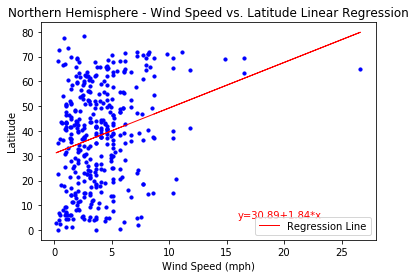

In [18]:
#Best Fit Polynomial
ws_n = np.polyfit(northern["Wind Speed"], northern["Lat"], 1)

#Scatter Plot
plt.scatter(northern["Wind Speed"], northern["Lat"], color='blue', linewidth=1, s=10)

#Regression Lines
plt.plot(northern["Wind Speed"], ws_n[0]*northern["Wind Speed"]+ws_n[1], color='red', linewidth=1)

#Regression Equations
plt.text(16, 5,'y={:.2f}+{:.2f}*x'.format(ws_n[1],ws_n[0]),color='red',size=10)

#Legend, title, labels
plt.legend(labels=['Regression Line'])
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(0, 0.5, 'Latitude')

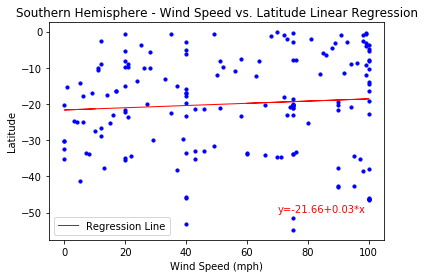

In [19]:
#Best Fit Polynomial
ws_s = np.polyfit(southern["Cloudiness"], southern["Lat"], 1)

#Scatter Plot
plt.scatter(southern["Cloudiness"], southern["Lat"], color='blue', linewidth=1, s=10)

#Regression Lines
plt.plot(southern["Cloudiness"], ws_s[0]*southern["Cloudiness"]+ws_s[1], color='red', linewidth=1)

#Regression Equations
plt.text(70, -50,'y={:.2f}+{:.2f}*x'.format(ws_s[1],ws_s[0]),color='red',size=10)

#Legend, title, labels
plt.legend(labels=['Regression Line'])
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")